# Introduction        


**In this notebook we are goring to** 
* Understand the Dataset & cleanup (if required).
* Build XGBoost classification models to predict whether the cancer type is Malignant or Benign.
* Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

##### Importing Libraries

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

##### Importing Dataset

In [3]:
# Loading dataset
df = pd.read_csv("data/breast-cancer.csv")

In [4]:
# observing 5 rows of data using random sampling
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
467,9113514,B,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,...,11.15,24.62,71.11,380.2,0.1388,0.12550,0.06409,0.0250,0.3057,0.07875
438,909231,B,13.850,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.022930,...,15.63,28.01,100.90,749.1,0.1118,0.11410,0.04753,0.0589,0.2513,0.06911
509,915460,M,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,...,17.11,36.33,117.70,909.4,0.1732,0.49670,0.59110,0.2163,0.3013,0.10670
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.000000,...,11.66,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.0000,0.2458,0.06592
214,8810955,M,14.190,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.064620,...,16.86,34.85,115.00,811.3,0.1559,0.40590,0.37440,0.1772,0.4724,0.10260


# Exploratory And Analysis To Get Some Information About Dataset 

In [5]:
# Finding the shape of our dataset
print(f"Number of Rows: {df.shape[0]} and Number of Columns: {df.shape[1]}")

Number of Rows: 569 and Number of Columns: 32


In [6]:
# Getting some information about our whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Descriptive Statical Analysis

In [7]:
# getting statical information about our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#### Missing Values

In [8]:
# Checking for null Values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Duplicate Rows

In [9]:
# Checking for duplicate rows in dataset
df.duplicated().sum()

0

There are no missing values and no duplicate rows in our dataset

### Data Types

In our dateset we have to type of data
1. Numerical Data
2. Catgorical Data

Here,
Numerical Data :  its values will always be in a number form     
Categorical Data: ategorical data is a form of qualitative data that can be grouped into categories instead of measured numerically

In [10]:
# Let's get numerical features 
numerical_features = [feature for feature in df.columns if df[feature].dtypes not in ['o', 'O', 'object', 'OBJECT']]
print(numerical_features)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
print(f'We have total of {len(numerical_features)} Numerical Fetures')

We have total of 31 Numerical Fetures


In [12]:
# Let's get numerical features 
categorical_features = [feature for feature in df.columns if df[feature].dtypes in ['o', 'O', 'object', 'OBJECT']]
print(categorical_features)

['diagnosis']


###### All 31 Numerical Columns are Independent variables i.e. features and One "diagnosis" is our Taregt Column 

# Univeriant Analysis

Analysing each variables seperatly

##### Analysisng our Target Feature

In [13]:
# find the unique values count in our target feature
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

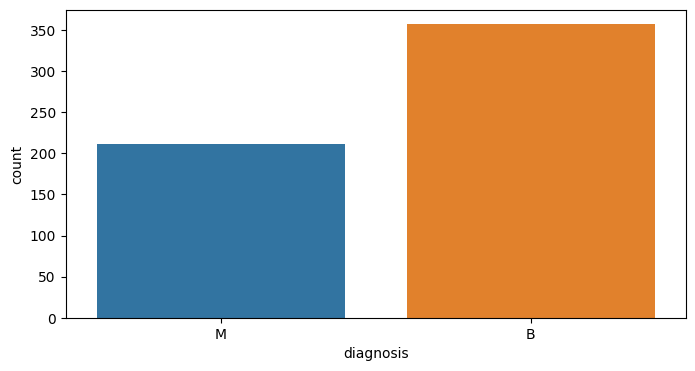

In [14]:
# plot a counter plot to better understand our target feature
plt.figure(figsize=(8,4))
sns.countplot(x = 'diagnosis',data = df)
plt.show()

**Inference:**

* Our target varaible have only two class. M and B. Here M and M representes Malignant and Benign respectilvey.
* We can see that we have inblacne dataset.
* We have to keep same ratio while we spliting our dataset into training and testing set.

##### Label Encoding

Here we Encode M as 1 and B as 0

In [15]:
df.diagnosis=[1 if each=="M" else 0 for each in df.diagnosis]

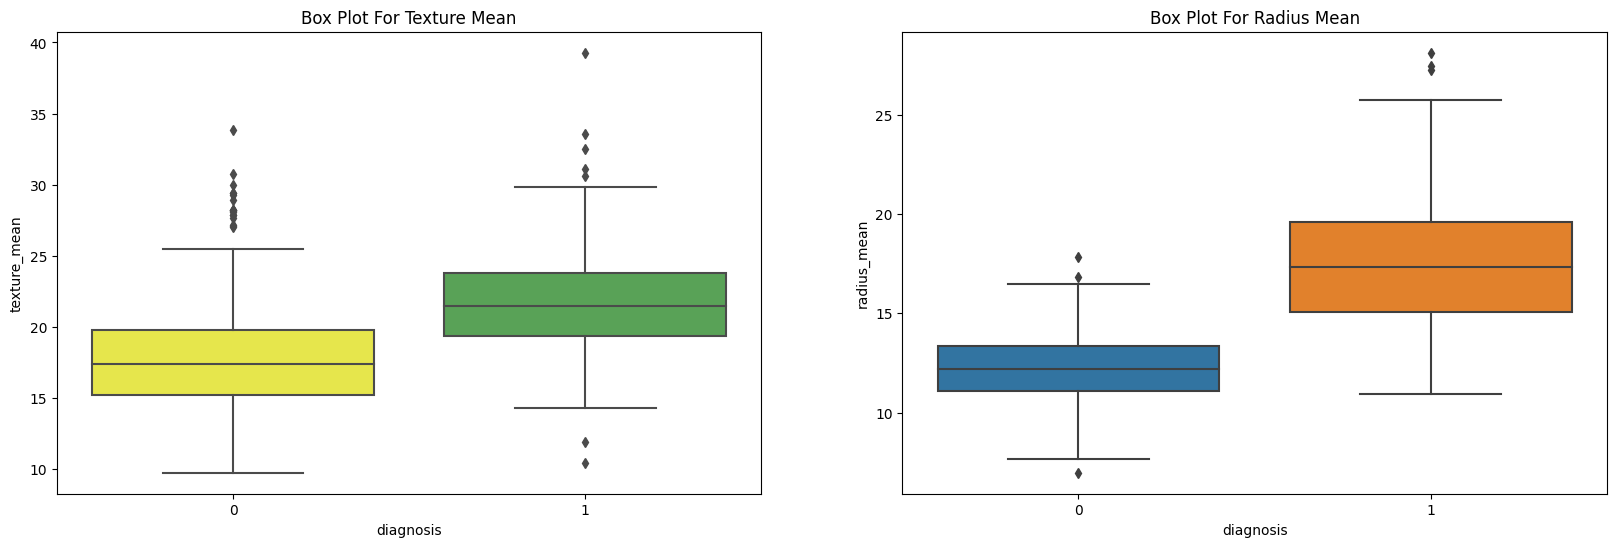

In [16]:
# Box Plot For Our Target Feature
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title("Box Plot For Texture Mean")
sns.boxplot(data=df,x="diagnosis",y="texture_mean",palette="Set1_r")

plt.subplot(1,2,2)
plt.title('Box Plot For Radius Mean')
sns.boxplot(data=df,x="diagnosis",y="radius_mean")

plt.show()

**Inference:**
* Malignant tumors have larger radius. So we can say; Malignant cancer cells are larger in size than benign cancer cells.
* the tissue average of malignant cancer cells is larger.

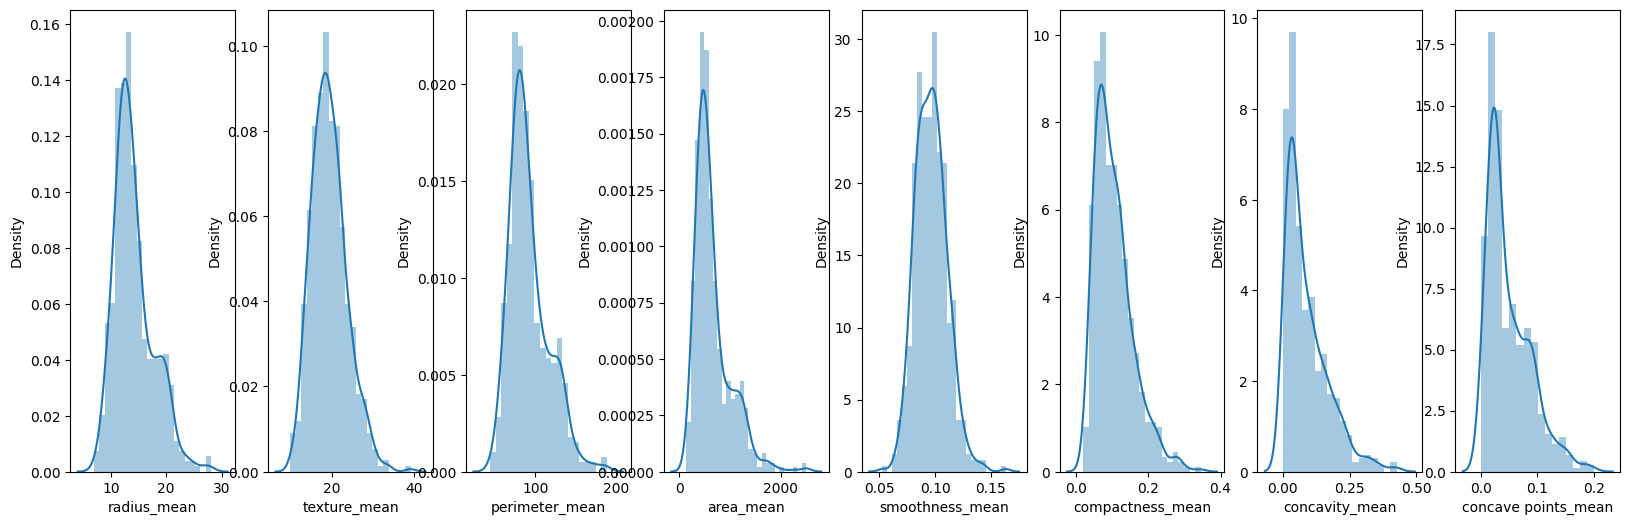

In [17]:
##### Ploting the distribution of all numerical features
# Here we excluding id 

index = 1
plt.figure(figsize=(20,6))
for feature in numerical_features[1:9]:
    plt.subplot(1,8,index)
    sns.distplot(df[feature])
    index += 1

plt.show()

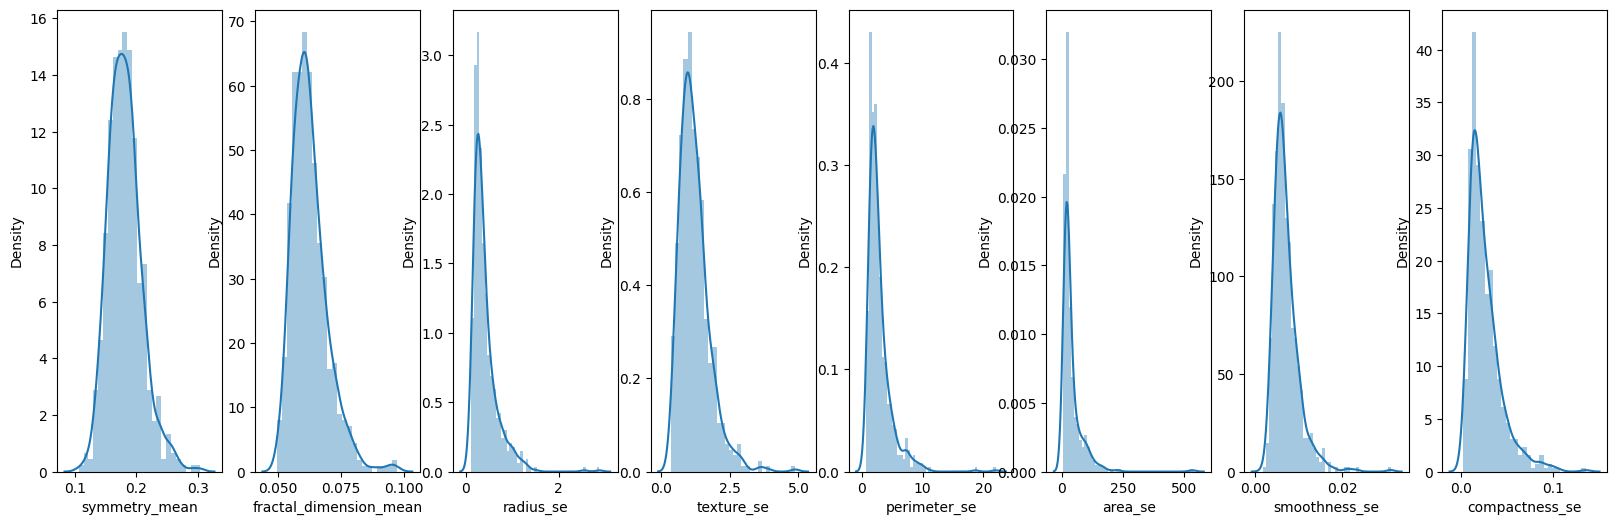

In [18]:
index = 1
plt.figure(figsize=(20,6))
for feature in numerical_features[9:17]:
    plt.subplot(1,8,index)
    sns.distplot(df[feature])
    index += 1

plt.show()

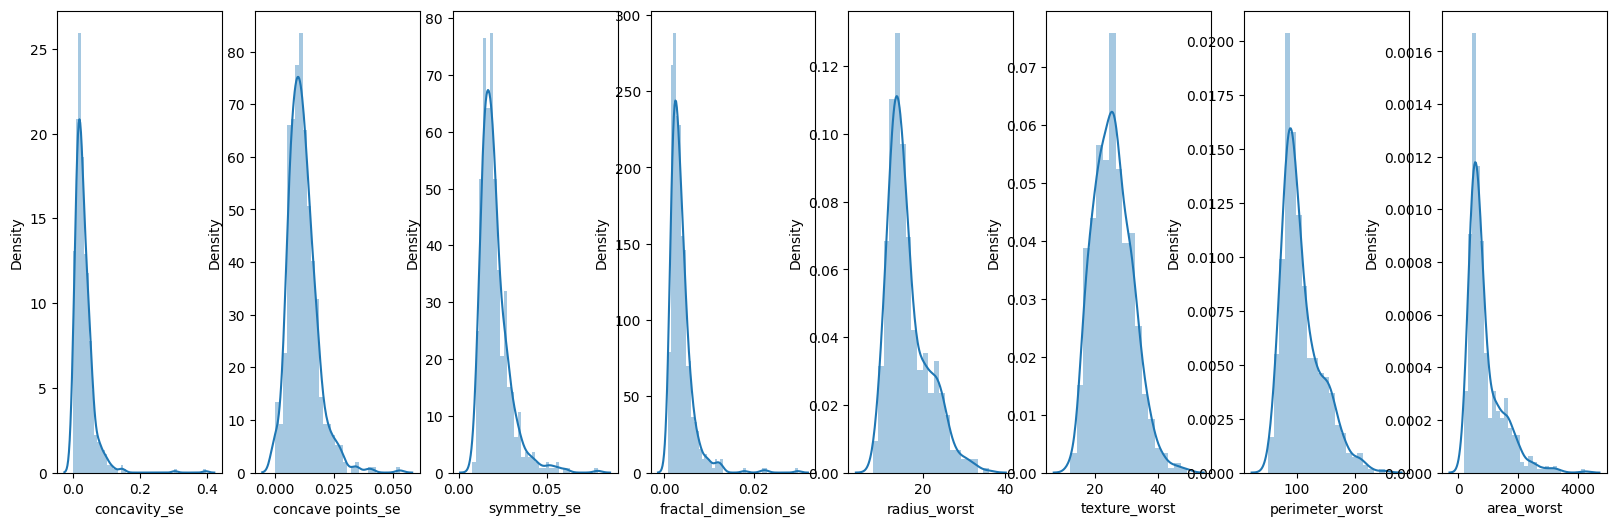

In [19]:
index = 1
plt.figure(figsize=(20,6))
for feature in numerical_features[17:25]:
    plt.subplot(1,8,index)
    sns.distplot(df[feature])
    index += 1

plt.show()

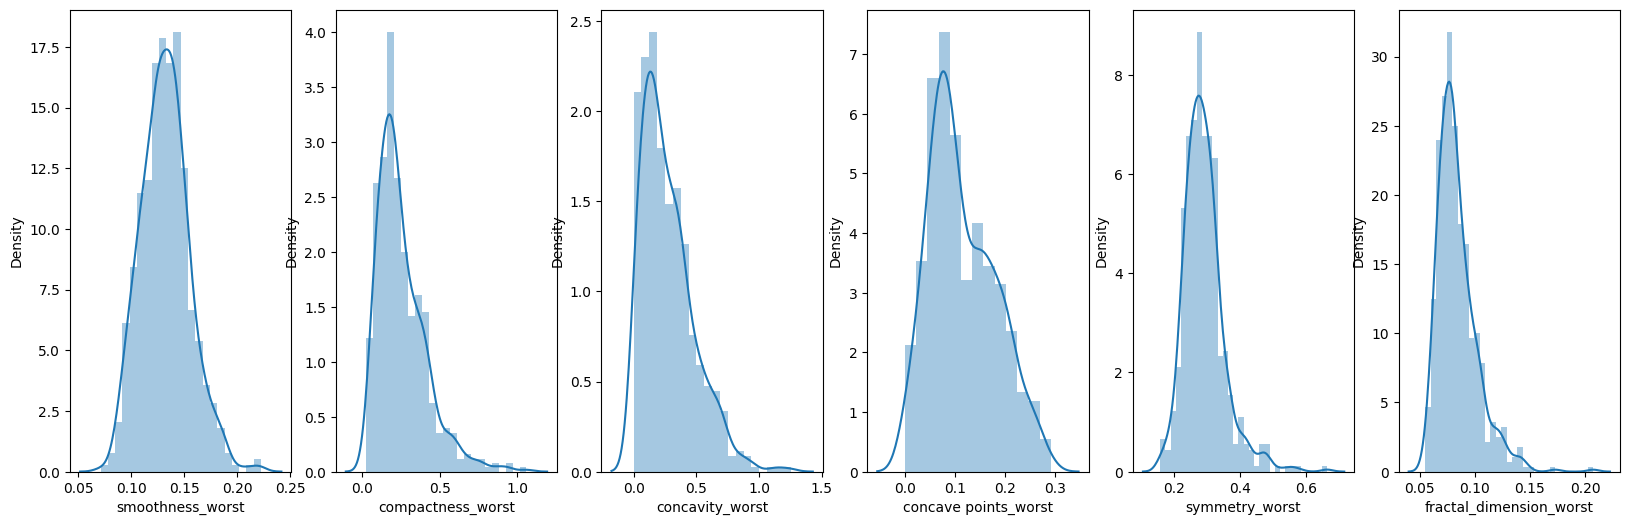

In [20]:
index = 1
plt.figure(figsize=(20,6))
for feature in numerical_features[25:32]:
    plt.subplot(1,6,index)
    sns.distplot(df[feature])
    index += 1

plt.show()

# BiVariant Analysis

Now let's find the relationship between independent and dependent numerical features

In [22]:
# Finding the relationship of each fature with others
#sns.pairplot(df.loc[:,2:10], hue = 'diagnosis')
#plt.show()

In [23]:
# Findin the correlation between each features
corr = df.corr()
corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


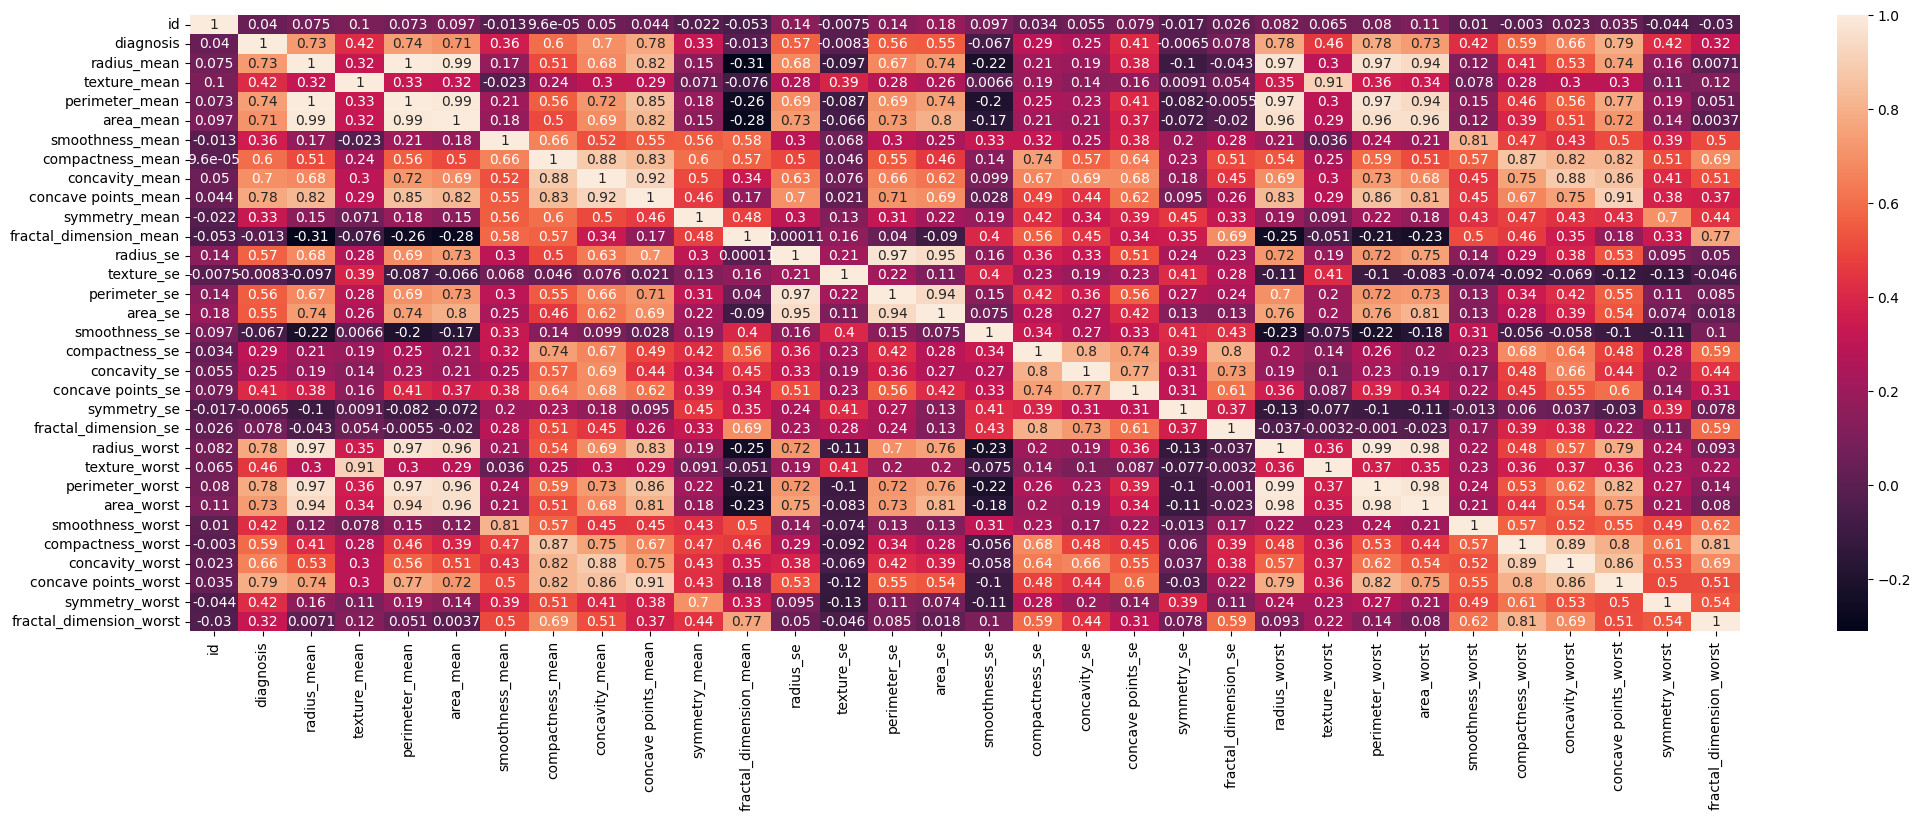

In [29]:
# Display the Correlation Matrix Using Headmap
plt.figure(figsize=(25,8))
sns.heatmap(corr, annot = True)
plt.show()

# Feature Engineering

# Model Building

# HyperParameters Tuining

# Performance Evaulation

# Conclusion